In [9]:
import os, shutil
train_dir = '../train'
validation_dir = '../validation'
test_dir = '../test'

In [10]:
from keras.utils import image_dataset_from_directory

IMG_SIZE = 32

train_dataset = image_dataset_from_directory(train_dir,label_mode='categorical',image_size=(IMG_SIZE, IMG_SIZE),batch_size=512)
validation_dataset = image_dataset_from_directory(validation_dir,label_mode='categorical',image_size=(IMG_SIZE, IMG_SIZE),batch_size=128)
test_dataset = image_dataset_from_directory(test_dir,label_mode='categorical',image_size=(IMG_SIZE, IMG_SIZE),batch_size=128)

Found 40000 files belonging to 10 classes.
Found 10000 files belonging to 10 classes.
Found 10000 files belonging to 10 classes.


In [11]:
from tensorflow.keras.applications.vgg16 import VGG16

conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
conv_base.trainable = False

In [12]:
from tensorflow import keras
import numpy as np

def get_features_and_labels(dataset):
    all_features = []
    all_labels = []
    for images, labels in dataset:
        preprocessed_images = keras.applications.vgg16.preprocess_input(images)
        features = conv_base.predict(preprocessed_images)
        all_features.append(features)
        all_labels.append(labels)
    return np.concatenate(all_features), np.concatenate(all_labels)

In [40]:
train_features, train_labels = get_features_and_labels(train_dataset)
val_features, val_labels = get_features_and_labels(validation_dataset)
test_features, test_labels = get_features_and_labels(test_dataset)

11/16 [===================>..........] - ETA: 0s

KeyboardInterrupt: 

In [15]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

In [38]:
from tensorflow import keras
from keras import layers

inputs = keras.Input(shape=(1, 1, 512))
x = layers.Flatten()(inputs)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(10, activation="softmax")(x)

model = keras.Model(inputs, outputs)

In [39]:
import tensorflow as tf
model.compile(loss='categorical_crossentropy',optimizer=tf.keras.optimizers.RMSprop(learning_rate=2e-5),metrics=['accuracy'])

history = model.fit(train_features, train_labels,epochs=20, batch_size=64,validation_data=(val_features, val_labels))

Epoch 1/20
625/625 [==============================] - 2s 3ms/step - loss: 25.3141 - accuracy: 0.2230 - val_loss: 10.2388 - val_accuracy: 0.4184
Epoch 2/20
625/625 [==============================] - 1s 2ms/step - loss: 17.8831 - accuracy: 0.3472 - val_loss: 8.4554 - val_accuracy: 0.5048
Epoch 3/20
625/625 [==============================] - 1s 2ms/step - loss: 15.2193 - accuracy: 0.4015 - val_loss: 7.5560 - val_accuracy: 0.5393
Epoch 4/20
625/625 [==============================] - 1s 2ms/step - loss: 13.8521 - accuracy: 0.4285 - val_loss: 6.8801 - val_accuracy: 0.5637
Epoch 5/20
625/625 [==============================] - 1s 2ms/step - loss: 12.5545 - accuracy: 0.4511 - val_loss: 6.4417 - val_accuracy: 0.5776
Epoch 6/20
625/625 [==============================] - 1s 2ms/step - loss: 11.8918 - accuracy: 0.4660 - val_loss: 6.0707 - val_accuracy: 0.5884
Epoch 7/20
625/625 [==============================] - 1s 2ms/step - loss: 11.3104 - accuracy: 0.4706 - val_loss: 5.7895 - val_accuracy: 0.599

In [ ]:
#Fazer save do model pag 71

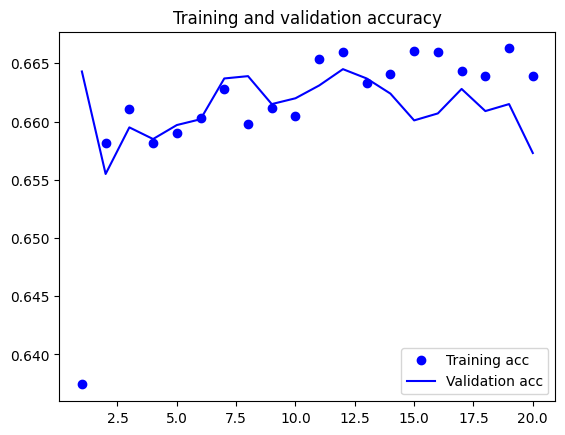

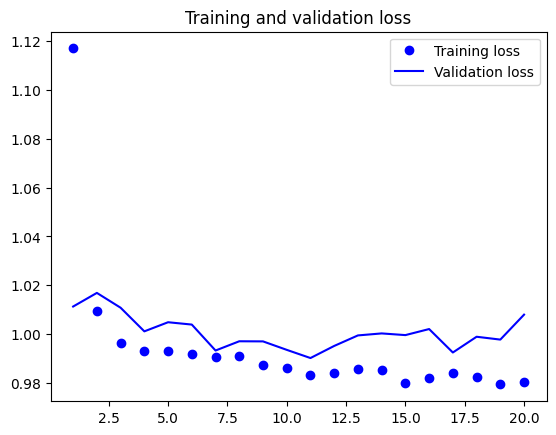

In [25]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc,'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss,'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()